# Figure 1 - Ye et al. 2023

- load the raw images that were used to create Figure 1 IID datasets and OOD datasets
- note this requires minimal requirements of `numpy` and `matplotlib`

In [3]:
import matplotlib.pyplot as plt
import glob
import os
import sys
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np

In [4]:
topview_iid_files = glob.glob('Figure1_topview/iid/*.png')
topview_iid_files = sorted(topview_iid_files)

topview_pred_iid_files = glob.glob('pred_topview_test_iid/*.png')
topview_pred_iid_files = sorted(topview_pred_iid_files)

topview_ood_files = glob.glob('Figure1_topview/ood/*.png')
topview_ood_files = sorted(topview_ood_files)

topview_pred_ood_files = glob.glob('pred_topview_test_ood/*.png')
topview_pred_ood_files = sorted(topview_pred_ood_files)


print (len(topview_pred_iid_files))

11


## Load the raw images from the IID dataset:

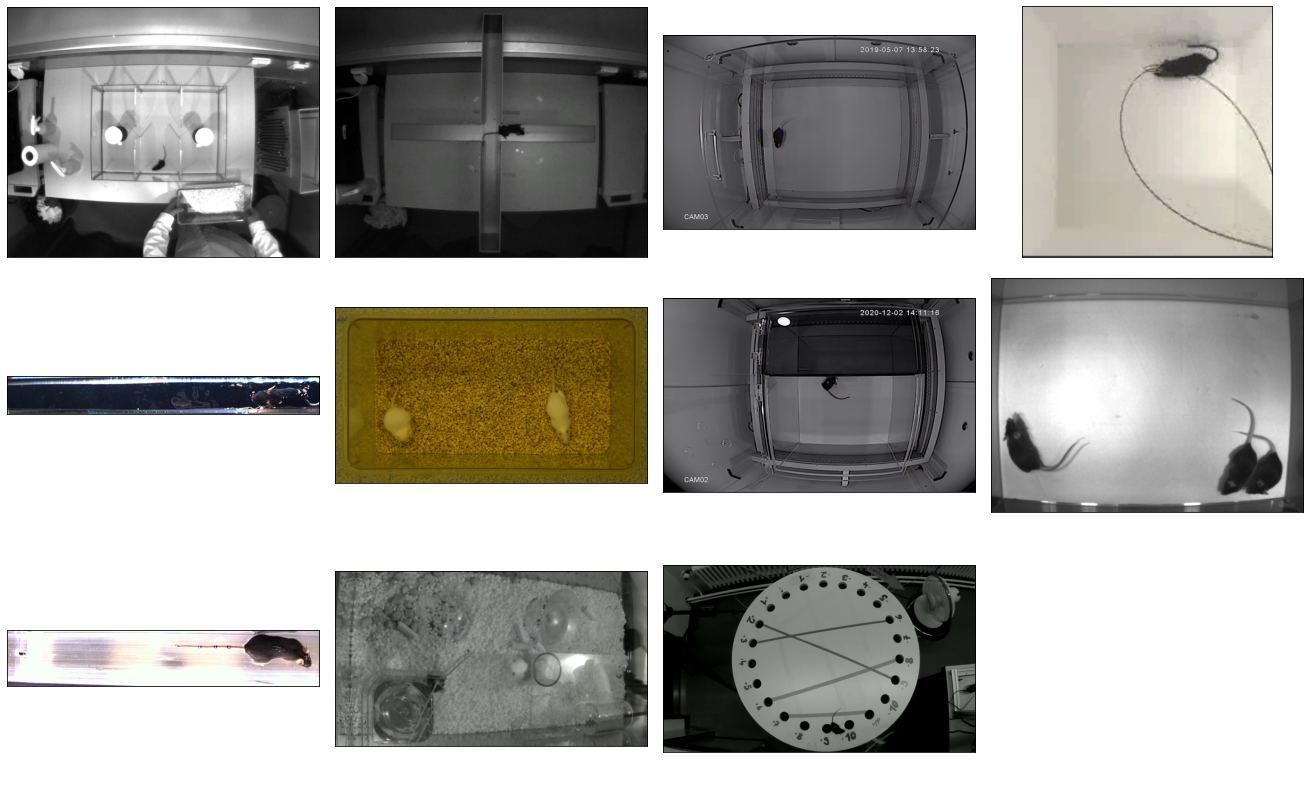

In [5]:
fig, axes = plt.subplots(3,4)

for idx in range(12):
    row = idx //4
    col = idx % 4
    
    if idx > 10:
        axes[row][col].axis('off')
        continue    
    
    file = topview_iid_files[idx]
    img =  mpimg.imread(file)    
    axes[row][col].imshow(img)
    axes[row][col].set_xticks([])
    axes[row][col].set_yticks([])                

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.05, hspace=0.05)
fig.set_size_inches(20, 12) 
plt.show()

## Plot the outputs of SupeAnimal-TopViewMouse IID:

In [6]:
fig, axes = plt.subplots(3,4, dpi=600)

for idx in range(12):
    row = idx //4
    col = idx % 4
    
    if idx > 10:
        axes[row][col].axis('off')
        continue    
    
    file = topview_pred_iid_files[idx]
    img =  mpimg.imread(file)    
    axes[row][col].imshow(img)
    axes[row][col].set_xticks([])
    axes[row][col].set_yticks([])                

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.05, hspace=0.05)
fig.set_size_inches(20, 12) 
plt.show()

## Load the raw images from the OOD dataset:

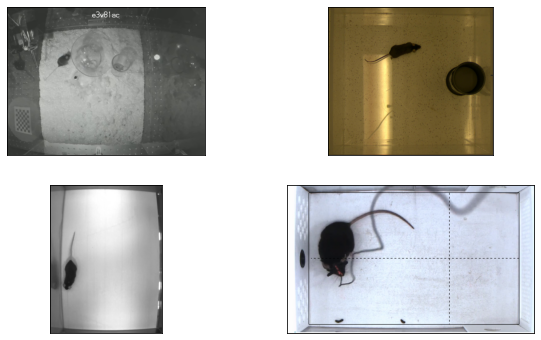

In [7]:
fig, axes = plt.subplots(2,2)

for idx in range(4):
    row = idx //2
    col = idx % 2
           
    
    file = topview_ood_files[idx]
    img =  mpimg.imread(file)    
    axes[row][col].imshow(img)
    axes[row][col].set_xticks([])
    axes[row][col].set_yticks([])                

fig.set_size_inches(10, 6) 
plt.show()

## Plot the outputs of SuperAnimal-TopViewMouse OOD:

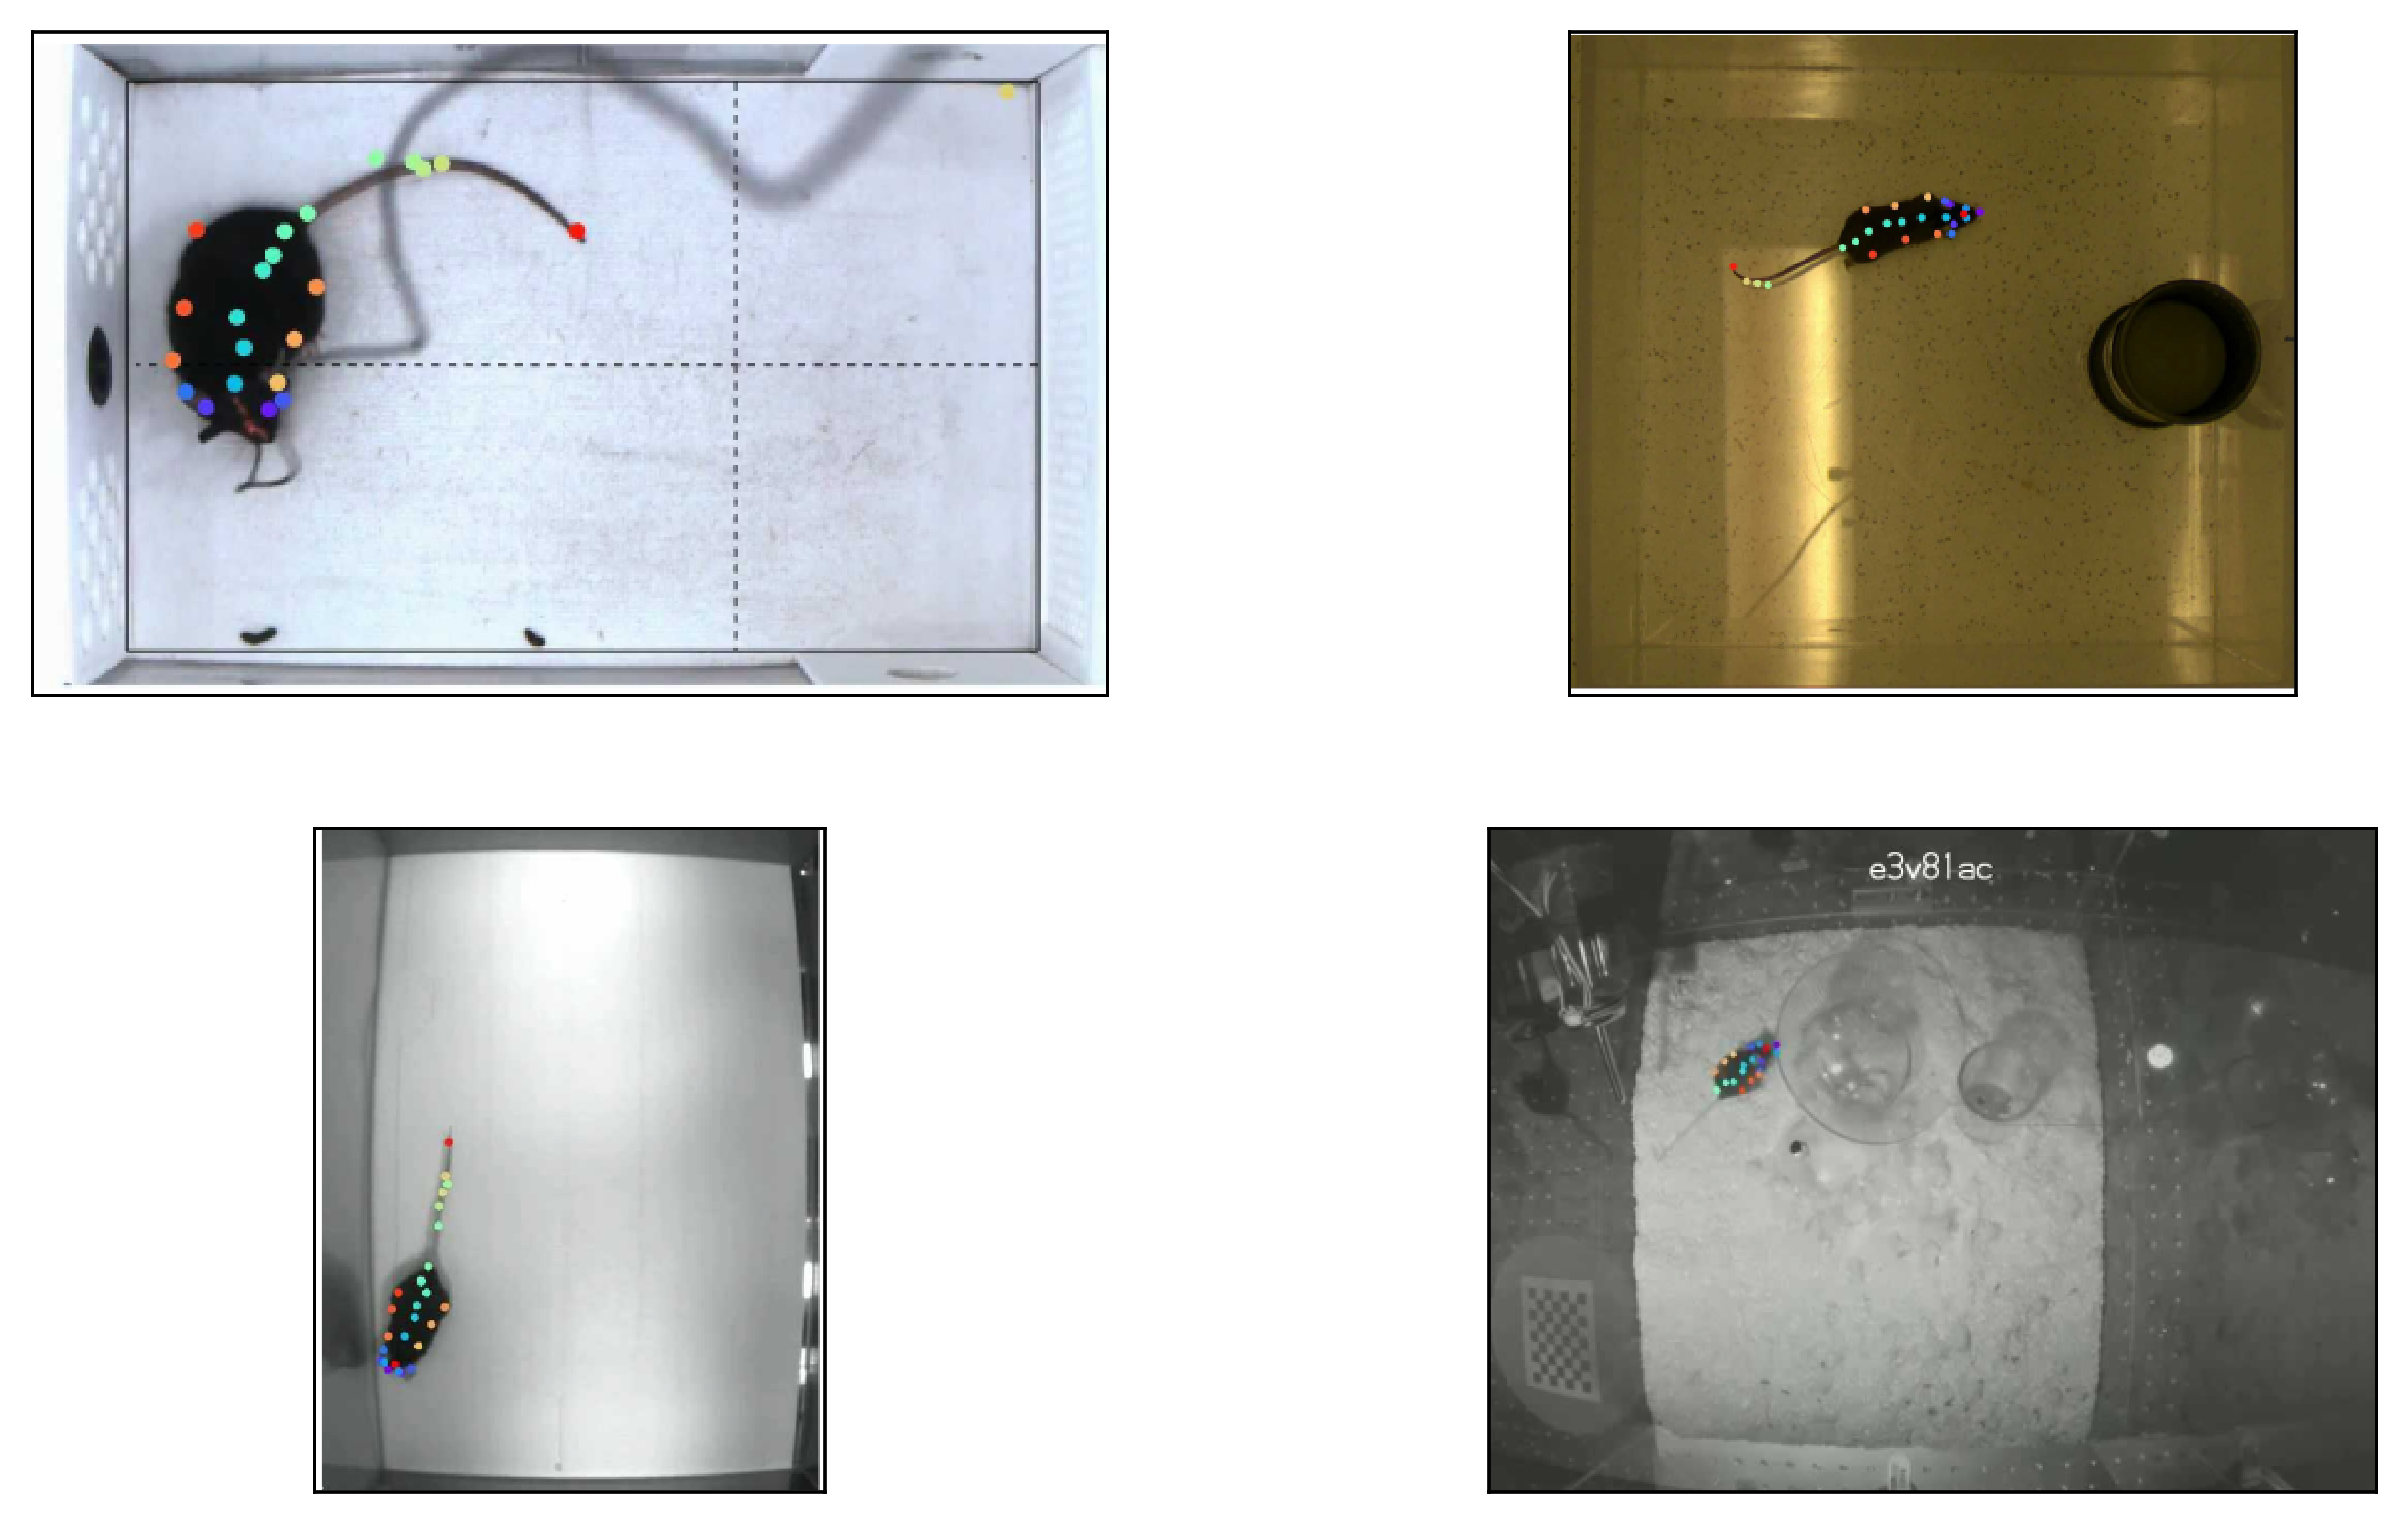

In [8]:
fig, axes = plt.subplots(2,2, dpi=600)

for idx in range(4):
    row = idx //2
    col = idx % 2
            
    file = topview_pred_ood_files[idx]
    img =  mpimg.imread(file)    
    axes[row][col].imshow(img)
    axes[row][col].set_xticks([])
    axes[row][col].set_yticks([])                

fig.set_size_inches(10, 6) 
plt.show()

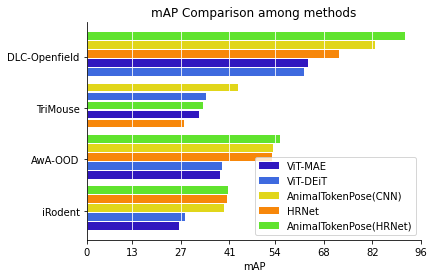

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset names
datasets = ['iRodent', 'AwA-OOD', 'TriMouse', 'DLC-Openfield']

# mAP values for the methods
map_values = {
    'ViT-MAE': [26.6, 38.2, 32.4, 63.6],
    'ViT-DEiT': [28.2, 38.9, 34.2, 62.4],
    'AnimalTokenPose(HRNet)': [40.7, 55.6, 33.4, 91.5],
    'AnimalTokenPose(CNN)': [39.5, 53.5, 43.5, 82.7],
    'HRNet': [40.3, 53.3, 28.1, 72.3],
}

colors = {
    'ViT-MAE': '#3017bf',
    'ViT-DEiT': '#3e6adf',
    'AnimalTokenPose(HRNet)': '#60e32e',
    'AnimalTokenPose(CNN)': '#e1d61a',
    'HRNet': '#f7870a',
}

# Sort mAP values within each dataset
sorted_map_values = {dataset: sorted([(method, map) for method, map in zip(map_values.keys(), map_row)], key=lambda x: x[1]) for dataset, map_row in zip(datasets, zip(*map_values.values()))}

# Create a horizontal bar plot
bar_width = 0.15
space_between_bars = 0.025
y = np.arange(len(datasets))

fig, ax = plt.subplots()

for dataset_idx, dataset in enumerate(datasets):
    for method_idx, (method, map_value) in enumerate(sorted_map_values[dataset]):
        ax.barh(dataset_idx + method_idx * (bar_width + space_between_bars) - 2 * bar_width, map_value, bar_width, label=method if dataset_idx == 0 else None, color=colors[method])

# Add dataset labels and format the plot
ax.set_xlabel('mAP')
ax.set_title('mAP Comparison among methods')
ax.set_yticks(y)
ax.set_yticklabels(datasets)
ax.legend()

# Remove the right and top axes
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add white grid lines for the x-axis
ax.set_xticks(np.linspace(0, ax.get_xlim()[1], 8).astype(np.int32))
ax.xaxis.grid(True, color='white')


/var/folders/n5/5_x4w2px2wn6hc6n_9zzlygw0000gn/T/ipykernel_17836/926124305.py:18: PerformanceWarning: indexing past lexsort depth may impact performance.
  unbalanced_zeroshot = temp.loc['unbalanced_zeroshot', '600000']  # .mean(axis=0)
/var/folders/n5/5_x4w2px2wn6hc6n_9zzlygw0000gn/T/ipykernel_17836/926124305.py:29: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  temp.drop(drop_list, inplace=True)


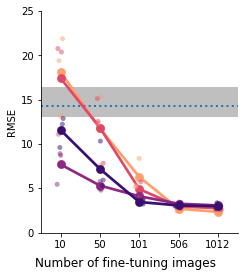

In [5]:
import pandas as pd
def plot_openfield_data_efficiency():
    dataset_decomposition = pd.read_hdf('../data/Figure2/dataset_decomposition.h5')
    rename_dict = {'swimming_ole': 'Kiehn_Lab_Swimming',
               'openfield_ole': 'Kiehn_Lab_Openfield',
               'treadmill_ole': 'Kiehn_Lab_Treadmill',
               'MackenzieMausHaus': 'MausHaus',
               'daniel3mouse': 'TriMice',
               'dlc-openfield': 'DLC_Openfield',
               'TwoWhiteMice_GoldenLab': 'WhiteMice',
               'ChanLab': 'BlackMice'
               }

    dataset_decomposition.rename(index=rename_dict, inplace=True)
    temp = pd.read_hdf('../data/Figure2/openfield_ratios.h5')

    dataset_size = dataset_decomposition.loc['super_topview'].loc['DLC_Openfield'].loc['num_images']
    unbalanced_zeroshot = temp.loc['unbalanced_zeroshot', '600000']  # .mean(axis=0)
    #print ('openfield data efficiency')
    #print(unbalanced_zeroshot.mean())

    drop_list = ['balanced_memory_replay_threshold_0.0_750000',
                 'unbalanced_zeroshot',
                 'balanced_zeroshot',
                 'balanced_super_remove_head_750000',
                 'balanced_memory_replay_threshold_0.8_snapshot_700000',
                 'balanced_memory_replay_threshold_0.8_750000',
                 'unbalanced_memory_replay_750000']
    temp.drop(drop_list, inplace=True)

    #print(temp.groupby(level=(0, 1)).mean())
    # print (temp.to_string())
    rename_dict = {'baseline': 'ImageNet transfer learning',
                   'zeroshot': 'SA + Zeroshot',
                   'super_remove_head': 'SA + Randomly Initialized Decoder',
                   'unbalanced_memory_replay_threshold_0.8_700000': 'SA + Memory Replay',
                   'unbalanced_naive_finetune_700000': 'SA + Naive Fine-tuning'}
    temp.rename(index=rename_dict, inplace=True)
    df = temp.reset_index().loc(axis=1)[['level_0', 'level_1', 'level_2', 'RMSE']]
    df_masked = df[df['level_0'] != 'unbalanced_zeroshot']
    df_masked['level_1'] = (pd.to_numeric(df_masked['level_1']) * dataset_size * 0.95).astype(int)
    fig, ax1 = plt.subplots(
        ncols=1,
        tight_layout=True,
        figsize=(3.5, 4),
        sharex=True,
        sharey=True,
    )

    RMSE_min = np.min(unbalanced_zeroshot['RMSE'])
    RMSE_max = np.max(unbalanced_zeroshot['RMSE'])

    ax1.axhline(unbalanced_zeroshot['RMSE'].mean(), ls=':', lw=2)

    ax1.axhspan(RMSE_min, RMSE_max, facecolor='grey', alpha=0.5)

    pal = 'magma_r'
    sns.pointplot(data=df_masked, x="level_1", y="RMSE", ax=ax1, hue='level_0', palette=pal, errorbar=None)
    sns.stripplot(data=df_masked, x="level_1", y="RMSE", ax=ax1, hue='level_0', palette=pal, alpha=.5)
    ax1.legend().remove()
    ax1.set_xlabel('')
    ax1.set_ylabel('RMSE')
    ax1.set_ylim(0, 25)
    sns.despine(top=True, right=True, ax=ax1)
    fig.supxlabel('Number of fine-tuning images', y=0.05, x=0.5125)
    #fig.savefig('Figure2c-DLC-openfield.png', dpi=600, bbox_inches='tight', pad_inches=0.05)
plot_openfield_data_efficiency()